In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import os
import dateutil
#import datetime as dt

In [4]:
df= pd.read_csv('D:/MachineLearning/municipality_bus_utilization.csv')
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 408.6+ KB


In [6]:
df.describe(include='all')

,timestamp,municipality_id,usage,total_capacity
count,13070,13070.000000,13070.000000,13070.000000
unique,1309,NaN,NaN,NaN
top,2017-06-04 07:59:42,NaN,NaN,NaN
freq,10,NaN,NaN,NaN
mean,NaN,4.500000,876.002984,1972.800000
std,NaN,2.872391,679.287109,1144.074782
min,NaN,0.000000,11.000000,397.000000
25%,NaN,2.000000,403.000000,697.000000
50%,NaN,4.500000,692.000000,1974.500000
75%,NaN,7.000000,1190.000000,2947.000000


In [7]:

t=df.groupby('municipality_id').agg(['max'])
t

,timestamp,usage,total_capacity
,max,max,max
municipality_id,,,
0,2017-08-19 16:30:35,1543,2813
1,2017-08-19 16:30:35,412,397
2,2017-08-19 16:30:35,697,697
3,2017-08-19 16:30:35,1646,1930
4,2017-08-19 16:30:35,3508,3893
5,2017-08-19 16:30:35,582,587
6,2017-08-19 16:30:35,1920,3113
7,2017-08-19 16:30:35,1923,2019


In [8]:
df.isna().sum()

timestamp          0
municipality_id    0
usage              0
total_capacity     0
dtype: int64

## Handling Missing values

<AxesSubplot:xlabel='usage', ylabel='Density'>

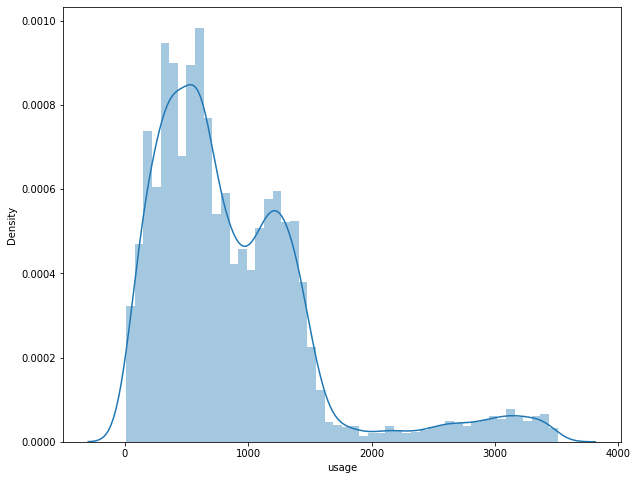

In [9]:
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df['usage'])

In [10]:
mean_ = df['usage'].mean()
mean_

876.0029839326702

In [11]:

df[['usage']].replace(to_replace= 0,value=mean_,inplace=True)

In [12]:
df.head(),df.min()

(             timestamp  municipality_id  usage  total_capacity
 0  2017-06-04 07:59:42                9    454            1332
 1  2017-06-04 07:59:42                8    556            2947
 2  2017-06-04 07:59:42                4   1090            3893
 3  2017-06-04 07:59:42                0    204            2813
 4  2017-06-04 07:59:42                7    718            2019,
 timestamp          2017-06-04 07:59:42
 municipality_id                      0
 usage                               11
 total_capacity                     397
 dtype: object)

## Feature Engineering

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['total_capacity']=df.total_capacity.astype('object')
df['municipality_id']=df.municipality_id.astype('object')  


In [14]:
df[df['municipality_id']==0]

,timestamp,municipality_id,usage,total_capacity
3,2017-06-04 07:59:42,0,204,2813
18,2017-06-04 08:25:42,0,247,2813
29,2017-06-04 08:59:42,0,332,2813
34,2017-06-04 09:32:46,0,429,2813
47,2017-06-04 09:59:48,0,485,2813
...,...,...,...,...
13024,2017-08-19 14:30:33,0,1285,2813
13031,2017-08-19 15:03:34,0,1283,2813
13041,2017-08-19 15:29:33,0,1286,2813
13059,2017-08-19 16:03:35,0,1276,2813


In [15]:
df=df.set_index(['timestamp'])
df2=df.groupby(['municipality_id','total_capacity']).resample("H").sum()
df2.head()

usage
municipality_id total_capacity timestamp                 
0               2813           2017-06-04 07:00:00    204
                               2017-06-04 08:00:00    579
                               2017-06-04 09:00:00    914
                               2017-06-04 10:00:00   1117
                               2017-06-04 11:00:00   1211

In [16]:
df2=df2.reset_index()
df2

,municipality_id,total_capacity,timestamp,usage
0,0,2813,2017-06-04 07:00:00,204
1,0,2813,2017-06-04 08:00:00,579
2,0,2813,2017-06-04 09:00:00,914
3,0,2813,2017-06-04 10:00:00,1117
4,0,2813,2017-06-04 11:00:00,1211
...,...,...,...,...
18335,9,1332,2017-08-19 12:00:00,1650
18336,9,1332,2017-08-19 13:00:00,1837
18337,9,1332,2017-08-19 14:00:00,1962
18338,9,1332,2017-08-19 15:00:00,1930


In [17]:
# capacity usage ratio will be created by usage and total_capacity
ratio= round(df2.usage/df2.total_capacity,3)
df2['ratio']=ratio

df2.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.99])

,municipality_id,total_capacity,usage,ratio
count,18340.00000,18340.000000,18340.000000,18340.000000
mean,4.50000,1972.800000,624.283479,0.344779
std,2.87236,1144.062204,1213.247232,0.567402
min,0.00000,397.000000,0.000000,0.000000
1%,0.00000,397.000000,0.000000,0.000000
5%,0.00000,397.000000,0.000000,0.000000
25%,2.00000,697.000000,0.000000,0.000000
50%,4.50000,1974.500000,0.000000,0.000000
75%,7.00000,2947.000000,822.000000,0.589000
99%,9.00000,3893.000000,6070.050000,2.159830


In [18]:
df2=df2.set_index(['timestamp','municipality_id']) 
df2.drop(columns=['usage','total_capacity'],axis=1,inplace=True)
df2.head()

,,ratio
timestamp,municipality_id,
2017-06-04 07:00:00,0,0.073
2017-06-04 08:00:00,0,0.206
2017-06-04 09:00:00,0,0.325
2017-06-04 10:00:00,0,0.397
2017-06-04 11:00:00,0,0.431


## Removing Outliers

In [21]:
df2= df2[df2['ratio']<2.1]
df2= df2[df2['ratio']>0.1]
df2

,,ratio
timestamp,municipality_id,
2017-06-04 08:00:00,0,0.206
2017-06-04 09:00:00,0,0.325
2017-06-04 10:00:00,0,0.397
2017-06-04 11:00:00,0,0.431
2017-06-04 12:00:00,0,0.218
...,...,...
2017-08-19 12:00:00,9,1.239
2017-08-19 13:00:00,9,1.379
2017-08-19 14:00:00,9,1.473


In [22]:
df2=df2.reset_index()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        6462 non-null   datetime64[ns]
 1   municipality_id  6462 non-null   int64         
 2   ratio            6462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 151.6 KB


In [23]:
days=df2['timestamp']
df2['MonthNum'] = df2['timestamp'].dt.month
df2['days']=days.dt.day_name()
df2['weekday'] = df2['timestamp'].dt.weekday
df2['Hours'] = df2['timestamp'].dt.hour

df2['days']=df2['days'].astype('string')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        6462 non-null   datetime64[ns]
 1   municipality_id  6462 non-null   int64         
 2   ratio            6462 non-null   float64       
 3   MonthNum         6462 non-null   int64         
 4   days             6462 non-null   string        
 5   weekday          6462 non-null   int64         
 6   Hours            6462 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), string(1)
memory usage: 353.5 KB


In [24]:
df2.head()

,timestamp,municipality_id,ratio,MonthNum,days,weekday,Hours
0,2017-06-04 08:00:00,0,0.206,6,Sunday,6,8
1,2017-06-04 09:00:00,0,0.325,6,Sunday,6,9
2,2017-06-04 10:00:00,0,0.397,6,Sunday,6,10
3,2017-06-04 11:00:00,0,0.431,6,Sunday,6,11
4,2017-06-04 12:00:00,0,0.218,6,Sunday,6,12


In [25]:
df3= df2.groupby('municipality_id').agg(['mean','max','min'])['ratio']
df3

,mean,max,min
municipality_id,,,
0,0.398468,1.487,0.101
1,1.341105,2.073,0.154
2,1.253716,2.096,0.283
3,1.028901,2.068,0.138
4,1.073534,2.099,0.124
5,0.591156,2.073,0.101
6,0.636590,1.748,0.128
7,1.072215,2.062,0.253
8,0.672325,2.003,0.119


In [26]:
import plotly.express as px
df3=df3.reset_index()
fig = px.bar(df3, x=df3.municipality_id, y='mean',hover_data=['mean', df3.index], 
             color='mean',orientation='v',title='Based on municipality_id')
fig.show()


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   municipality_id  10 non-null     int64  
 1   mean             10 non-null     float64
 2   max              10 non-null     float64
 3   min              10 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 448.0 bytes


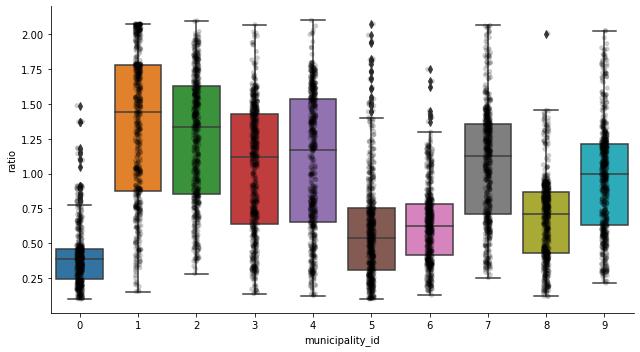

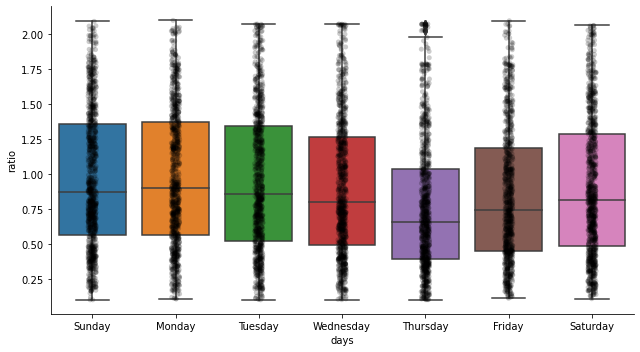

In [28]:
discrete_vars =['municipality_id','days']
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='ratio', data=df2, kind="box", height=5, aspect=1.8)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='ratio', data=df2, jitter=0.05, alpha=0.2, color='k')
    plt.show()

In [29]:
df4=df2.groupby('days').agg(['mean'])['ratio']
df4

,mean
days,
Friday,0.847998
Monday,0.971696
Saturday,0.900188
Sunday,0.960152
Thursday,0.761494
Tuesday,0.948971
Wednesday,0.904400


In [30]:
import plotly.express as px

fig = px.bar(df4, x='mean', y=df4.index.sort_values(),hover_data=['mean', df4.index], 
             color='mean',orientation='h',title='Based on week days')
fig.show()

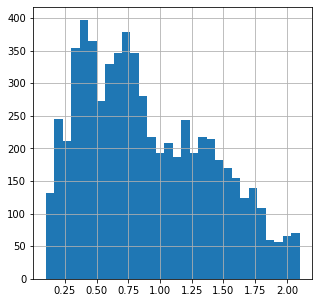

In [31]:
# lets plot histograms for continuous variable

df2['ratio'].hist(bins=30, figsize=(5,5))
plt.show()

In [32]:
df2.columns

Index(['timestamp', 'municipality_id', 'ratio', 'MonthNum', 'days', 'weekday',
       'Hours'],
      dtype='object')

In [33]:
muni=pd.get_dummies(df2['municipality_id'],prefix='munici',sparse=True)
hourT=pd.get_dummies(df2['Hours'],prefix='hour',sparse=True)
monthNum=pd.get_dummies(df2['MonthNum'],prefix='MonthNum',sparse=True)
weekD=pd.get_dummies(df2['weekday'],prefix='WeekDay',sparse=True)

In [34]:

df3=pd.concat([muni,hourT,monthNum,weekD,df2],axis=1,join="inner")
df3.head(5)

,munici_0,munici_1,munici_2,munici_3,munici_4,munici_5,munici_6,munici_7,munici_8,munici_9,...,WeekDay_4,WeekDay_5,WeekDay_6,timestamp,municipality_id,ratio,MonthNum,days,weekday,Hours
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,2017-06-04 08:00:00,0,0.206,6,Sunday,6,8
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,2017-06-04 09:00:00,0,0.325,6,Sunday,6,9
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,2017-06-04 10:00:00,0,0.397,6,Sunday,6,10
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,2017-06-04 11:00:00,0,0.431,6,Sunday,6,11
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,2017-06-04 12:00:00,0,0.218,6,Sunday,6,12


In [35]:
df3.columns

Index(['munici_0', 'munici_1', 'munici_2', 'munici_3', 'munici_4', 'munici_5',
       'munici_6', 'munici_7', 'munici_8', 'munici_9', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'MonthNum_6', 'MonthNum_7', 'MonthNum_8',
       'WeekDay_0', 'WeekDay_1', 'WeekDay_2', 'WeekDay_3', 'WeekDay_4',
       'WeekDay_5', 'WeekDay_6', 'timestamp', 'municipality_id', 'ratio',
       'MonthNum', 'days', 'weekday', 'Hours'],
      dtype='object')

In [36]:
print('first day: ',df3.timestamp.min()),print('last day :',df3.timestamp.max())

first day:  2017-06-04 07:00:00
last day : 2017-08-19 16:00:00


(None, None)

In [37]:
df_final= df3.drop(columns=['municipality_id','MonthNum', 'days', 'weekday', 'Hours'],axis=1)

df_final = df_final.sort_values(by='timestamp')

In [38]:
# Let's separate into train and test set
#last 2 week will be treated sperately therefore it will be removed delibaretely from test and train set  
import copy

ydf3_2w=df_final[df_final['timestamp']> '2017-08-05'].iloc[:,-1]

ydf3_2w.shape

(1339,)

In [39]:
Xdf3_2w=df_final[df_final['timestamp']> '2017-08-05']
Xdf3_2w.drop(columns=['timestamp','ratio'],axis=1,inplace=True)
Xdf3_2w.shape,df_final.shape

((1339, 30), (6462, 32))

In [40]:
#these data will be used for training and test purposes
Xdf3_ext=df_final[df_final['timestamp']<= '2017-08-05']
Xdf3_ext.drop(columns=['ratio','timestamp'],axis=1,inplace=True)
#print('X values, Extracted and reserved last 14 days for final test:',Xdf3_ext)

#print('y values, Extracted and reserved last 14 days for final test:')
ydf3_ext= df_final[df_final['timestamp'] <= '2017-08-05'].iloc[:,-1]
Xdf3_ext.shape, ydf3_ext.shape,df_final.shape

------------------------------------


((5123, 30), (5123,), (6462, 32))

In [41]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(Xdf3_ext,ydf3_ext ,
    test_size=0.25, 
    random_state=21)

X_train.shape, X_test.shape

((3842, 30), (1281, 30))

In [42]:
y_train.shape,y_test.shape

((3842,), (1281,))

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

In [81]:
def Best_Model_selection(X,y):
    seed =21
    models = []
    models.append(('LR', LinearRegression())) 
    models.append(('DT', DecisionTreeRegressor())) 
    models.append(('EXDT', ExtraTreesRegressor())) 
    models.append(('RF', RandomForestRegressor()))
    results = []
    names = []
    scoring = 'accuracy' 
    for name, model in models: 
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        result=r2_score(y_pred,y_test)
        results.append(result) 
        names.append(name) 
        msg =(name, results) 
        print(msg)

In [82]:
Best_Model_selection(X_train,y_train)

('LR', [0.2604948440719327])
('DT', [0.2604948440719327, 0.46016837930662513])
('EXDT', [0.2604948440719327, 0.46016837930662513, 0.46060180576113874])
('RF', [0.2604948440719327, 0.46016837930662513, 0.46060180576113874, 0.49216025954192844])


## Random Forest Regression Model

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [44]:
clf = RandomForestRegressor(n_estimators = 150, n_jobs = -1,random_state=21)
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=21)

In [45]:
accuracy = clf.score(X_test, y_test)
print(f'accuracy is found for baseline model: {accuracy}')


accuracy is found for baseline model: 0.6016409400831935


In [46]:
rf_pred_train=clf.predict(X_train)
rf_pred_test=clf.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
r_sq_train=r2_score(rf_pred_train,y_train)
r_sq_train

0.7319585106139541

In [48]:
r_sq_test=r2_score(rf_pred_test,y_test)
r_sq_test

0.49131247953403023

## Hyperparameter Tunning for RF model

In [49]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from matplotlib import style

In [50]:

n_estimators = [300,325,700] # number of trees in the random forest
max_features = ['auto'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(100, 150, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [ 11,12,13,14] # minimum sample number to split a node
min_samples_leaf = [2,4,5] # minimum sample number that can be stored in a leaf node
bootstrap = [True] # method used to sample data points

param_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [51]:
from sklearn.model_selection import GridSearchCV

rf_param = GridSearchCV(estimator = clf,param_grid = param_grid,
                cv = 5, verbose=2, n_jobs = -1)

In [52]:
rf_param.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=150, n_jobs=-1,
                                             random_state=21),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [100, 104, 109, 113, 118, 122, 127, 131,
                                       136, 140, 145, 150],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 5],
                         'min_samples_split': [11, 12, 13, 14],
                         'n_estimators': [300, 325, 700]},
             verbose=2)

In [53]:
print ('seach grid: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_param.best_params_, ' \n')

seach grid:  {'n_estimators': [300, 325, 700], 'max_features': ['auto'], 'max_depth': [100, 104, 109, 113, 118, 122, 127, 131, 136, 140, 145, 150], 'min_samples_split': [11, 12, 13, 14], 'min_samples_leaf': [2, 4, 5], 'bootstrap': [True]} 

Best Parameters:  {'bootstrap': True, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 700}  



In [54]:
best_rf = RandomForestRegressor(bootstrap= True, max_depth= 122, max_features= 'auto', min_samples_leaf= 4, min_samples_split=14, n_estimators= 300) 
best_rf.fit( X_train, y_train) 

RandomForestRegressor(max_depth=122, min_samples_leaf=4, min_samples_split=14,
                      n_estimators=300)

In [55]:
rf_pred_test2=best_rf.predict(X_test)

In [56]:
rf_pred_train2=best_rf.predict(X_train)

In [57]:
r_sq_train2=r2_score(rf_pred_train2,y_train)
r_sq_train2

0.6097001395567595

In [58]:
r_sq_test2=r2_score(rf_pred_test2,y_test)
r_sq_test2

0.5134131571730016

In [59]:
y_pred_rf2 = pd.DataFrame( { "actual": y_test, "predicted_prob": best_rf.predict(( X_test ) ) } ) 
y_pred_rf2

,actual,predicted_prob
2,0.397,0.398359
4060,0.618,0.648427
5344,0.327,0.546215
2982,1.768,1.478361
1255,1.316,1.327962
...,...,...
259,0.312,0.385236
6132,0.889,0.841758
4808,1.011,1.275808
4658,1.032,1.015171


In [60]:
y_pred2w=best_rf.predict(Xdf3_2w)
r_sq_2w=r2_score(y_pred2w,ydf3_2w)
r_sq_2w

0.40976241905495137

In [61]:
#last 2 weeks prediction comparision table
y_pred_2w = pd.DataFrame( { "actual": ydf3_2w, "predicted_prob": best_rf.predict(( Xdf3_2w ) ) } ) 
y_pred_2w

,actual,predicted_prob
1125,0.753,0.827453
498,0.164,0.175335
6323,0.478,0.791028
4983,0.610,0.831542
1744,0.879,1.003872
...,...,...
634,0.905,0.264020
1252,2.008,1.111424
3788,0.751,0.354186
5791,0.830,0.531067


Result is not at expected leveel therefore Neural network model will be created

## Neural Network model (Baseline and Complex Model)

In [62]:
import tensorflow as tf

### Baseline Neural Network Model

In [63]:
# Set random seed
tf.random.set_seed(21)
#create model

model = tf.keras.Sequential([
tf.keras.layers.Dense(30,activation='relu',input_dim=30), 
  tf.keras.layers.Dense(300,activation="relu"),
  tf.keras.layers.Dense(150,activation="sigmoid"),
  tf.keras.layers.Dense(90,activation="softmax"),
  tf.keras.layers.Dense(60,activation="tanh"), 
  tf.keras.layers.Dense(30,activation="sigmoid"), 
  tf.keras.layers.Dense(1,activation="relu"), 
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,verbose=0)

In [64]:
y_pred1=model.predict(X_test)

In [65]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred1.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.20055221>

In [66]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred1.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.08633662>

In [67]:
model_loss, model_mae = model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.2006 - mae: 0.2006


# hyperparameter tuning for Neural Network Model

In [68]:
# Set random seed
tf.random.set_seed(21)
#create model

model2 = tf.keras.Sequential([
tf.keras.layers.Dense(300,activation='relu',input_dim=30), 
  tf.keras.layers.Dense(300,activation="softmax"),
  tf.keras.layers.Dense(150,activation="sigmoid"),
  tf.keras.layers.Dense(90,activation="relu"),
  tf.keras.layers.Dense(60,activation="tanh"), 
  tf.keras.layers.Dense(30,activation="sigmoid"), 
   tf.keras.layers.Dense(15,activation="relu"), #increase layers
  tf.keras.layers.Dense(1,activation="relu"), 
])

# Compile the model
model2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # decreasse learning rate to 0.001
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history2 = model2.fit(X_train, y_train, epochs=700, batch_size=32,verbose=0) #increase epochs to 700

In [69]:
y_pred2=model2.predict(X_test)
y_pred2_train=model2.predict(X_train)

In [70]:
# Calcuate the MAE
mae2 = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_pred2.squeeze())
print('mae for 2nd model:',mae2)
print('mae for 1st model:',mae)

mae for 2nd model: tf.Tensor(0.22404224, shape=(), dtype=float32)
mae for 1st model: tf.Tensor(0.20055221, shape=(), dtype=float32)


In [71]:
# Calculate the MSE
mse2 = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_pred2.squeeze())
print('mse for 2nd model:',mse2)
print('mse for 1st model:',mse)

mse for 2nd model: tf.Tensor(0.109717615, shape=(), dtype=float32)
mse for 1st model: tf.Tensor(0.08633662, shape=(), dtype=float32)


In [72]:
model_loss2, model_mae2 = model2.evaluate(X_test, y_test)

41/41 [==============================] - 0s 3ms/step - loss: 0.2240 - mae: 0.2240


## Final Prediction by using last 2 weeks dataset

In [73]:
Xdf3_2w.shape,ydf3_2w.shape

((1339, 30), (1339,))

In [74]:
final_pred=model2.predict(Xdf3_2w)

In [75]:
# Calcuate the MAE
mae_final = tf.metrics.mean_absolute_error(y_true=ydf3_2w, 
                                     y_pred=final_pred.squeeze())
mae_final

<tf.Tensor: shape=(), dtype=float32, numpy=0.271482>

In [76]:
y_final_prediction=pd.DataFrame(final_pred,index=ydf3_2w.index)

In [77]:
r_sq_train=r2_score(y_pred2_train,y_train)
r_sq_train

0.7202649752226968

In [78]:
r_sq_test=r2_score(y_pred2,y_test)
r_sq_test

0.5148490105672051

In [79]:

comparision=pd.concat([y_final_prediction,ydf3_2w],axis=1,join="inner")
comparision



,0,ratio
1125,0.690802,0.753
498,0.163484,0.164
6323,0.418940,0.478
4983,0.621873,0.610
1744,1.070449,0.879
...,...,...
634,0.254531,0.905
1252,0.769401,2.008
3788,0.186695,0.751
5791,0.478777,0.830
